In [1]:
import socket
import numpy as np
import matplotlib.pyplot as plt
import serverBackend as sb
ip = sb.get_ip() #"127.0.0.1"
print(ip)
def send(key, TCP_IP = ip, TCP_PORT = 5006, BUFFER_SIZE = 1024):
    '''
    sends data to the server
    this funciton interacts with the server in the same way as the beamline interacts with motors
    '''
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    s.connect((TCP_IP, TCP_PORT))
    s.send(str(key).encode())
    data = s.recv(BUFFER_SIZE).decode()
    s.close()
    return data

192.168.1.246


In [18]:
'''
Communication with signal generator
'''
data = send('OUTPut = OFF')
print(data)
data = send('BURSt:STATe = ON')
print(data)
data = send('VOLTage:HIGH = 5.1')
print(data)
data = send('VOLTage:LOW = 5.0')
print(data)

OUTPut = OFF
BURSt:STATe = ON
VOLTage:HIGH = 5.1000E+00
VOLTage:LOW = 5.0000E+00


In [14]:
data = send('OUTPut = ON')
print(data)

OUTPut = ON


In [21]:
send('READ?',TCP_PORT = 5008)

'READ = -6.350410E-09'

In [2]:
'''
test, should return OUTPut = OFF
'''
data = send('OUTPut?')
print(data)

OUTPut = OFF


BURSt:STATe = ON


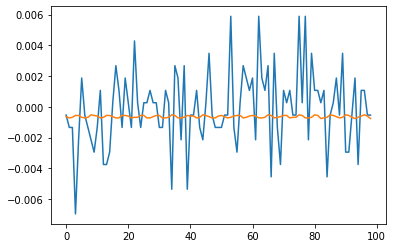

In [9]:
'''
Communication with oscilloscope
'''
waveforms = send('C1C2?',TCP_PORT = 5007, BUFFER_SIZE = 2048*2)

waveform_1 = np.array([float(s.strip(',')) for s in waveforms.split('_')[0].split(',')[1:]])
waveform_2 = np.array([float(s.strip(',')) for s in waveforms.split('_')[1].split(',')[1:]])

fig, ax = plt.subplots()
ax.plot(waveform_1)
ax.plot(waveform_2)
#av = np.average(waveform_1)
#ax.plot([0,100],av*np.array([1,1]))
#ax.text(50, av+0.03*np.max(waveform_1), f'{np.average(waveform_1):.3f} V', ha = 'center', backgroundcolor = [1,1,1, 0.3])

In [7]:
send('C1C2?',TCP_PORT = 5007, BUFFER_SIZE = 2048*2)

'C1C2 = #800001399-1.34296e-003, 4.28518e-003,-5.38941e-004,-2.95100e-003, 1.87312e-003,-5.38941e-004,-2.14699e-003,-2.14699e-003,-2.95100e-003,-1.34296e-003,-1.34296e-003,-5.38941e-004,-5.38941e-004, 2.65077e-004, 1.06909e-003,-1.34296e-003, 8.30528e-003,-5.38941e-004,-1.34296e-003, 1.06909e-003, 1.06909e-003,-1.34296e-003,-2.14699e-003,-2.14699e-003, 1.87312e-003, 4.28518e-003, 1.06909e-003, 2.65077e-004, 1.87312e-003,-1.34296e-003, 1.87312e-003, 1.87312e-003,-1.34296e-003,-1.34296e-003, 2.65077e-004, 2.65077e-004, 4.28518e-003,-1.34296e-003, 2.65077e-004,-7.77512e-003,-1.34296e-003, 1.87312e-003,-5.38941e-004, 5.89322e-003, 2.65077e-004,-5.38941e-004,-5.38941e-004, 1.87312e-003, 1.06909e-003, 5.08920e-003,-1.34296e-003,-1.34296e-003,-1.34296e-003,-1.34296e-003,-6.16708e-003, 5.08920e-003,-2.14699e-003, 2.65077e-004, 5.89322e-003,-6.97110e-003, 2.65077e-004, 5.89322e-003, 1.06909e-003, 1.06909e-003,-2.14699e-003,-1.34296e-003,-2.95100e-003, 3.48116e-003, 3.48116e-003, 6.69724e-003, 2

In [4]:
send('AvgC1C2?',TCP_PORT = 5007, BUFFER_SIZE = 2048*2)

'AvgC1C2 = 0.0005087193737373739, -0.0006326581616161616'